In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import random
from scipy import stats

# Figure 3

<a id='top'></a>

[1] [Last Her1 Peaks Times](#lastpeaks)

[2] [Mesp Onset Analysis](#mesp)

The data used to generate this figure is all coming from the in vitro cells experiments. 

## Last Her1 Peak Times

<a id='lastpeaks'></a>

In [2]:
PSM2 = pd.read_excel('../Data/Figure 3/last_peak_time_axis(ADJ and Unadj) May 29.xlsx', sheet_name='PSM2', header=[0,1])
PSM3 = pd.read_excel('../Data/Figure 3/last_peak_time_axis(ADJ and Unadj) May 29.xlsx', sheet_name='PSM3', header=[0,1])
PSM4 = pd.read_excel('../Data/Figure 3/last_peak_time_axis(ADJ and Unadj) May 29.xlsx', sheet_name='PSM4', header=[0,1])
TB = pd.read_excel('../Data/Figure 3/last_peak_time_axis(ADJ and Unadj) May 29.xlsx', sheet_name='TB', header=[0,1])

In [3]:
PSM4.head()

Experiment         419                                           \
       Cell Position          41   43          47          48          54   
0  Last Peak (unadj)  404.663296   70  200.191615  412.398186  366.115431   
1    Last Peak (adj)  454.663296  120  250.191615  462.398186  416.115431   

                                           ...        453              \
           56         68          70   73  ...         25          26   
0  355.937229  149.48934  150.333755   50  ...  348.47535  419.751598   
1  405.937229  199.48934  200.333755  100  ...  418.47535  489.751598   

                                                                           \
           27          29          33          34          35          36   
0  177.826669  499.857156  418.023236  413.663201  464.351386  230.264654   
1  247.826669  569.857156  488.023236  483.663201  534.351386  300.264654   

                           
           38          39  
0  361.056531  181.440726  
1  431.056531  251.440726  

[2 rows x 141 columns]

### Obtain the cells and experiments IDs

In [4]:
PSM4_cells_id = []
PSM4_exps_id = []

for i in range(1,len(PSM4.keys())):
    if type(PSM4.keys()[i][1])==int:
        PSM4_exps_id.append(PSM4.keys()[i][0])
        PSM4_cells_id.append(PSM4.keys()[i][1])   

PSM3_cells_id = []
PSM3_exps_id = []

for i in range(1,len(PSM3.keys())):
    if type(PSM3.keys()[i][1])==int:
        PSM3_exps_id.append(PSM3.keys()[i][0])
        PSM3_cells_id.append(PSM3.keys()[i][1])

PSM2_cells_id = []
PSM2_exps_id = []

for i in range(1,len(PSM2.keys())):
    if type(PSM2.keys()[i][1])==int:
        PSM2_exps_id.append(PSM2.keys()[i][0])
        PSM2_cells_id.append(PSM2.keys()[i][1])

TB_cells_id = []
TB_exps_id = []

for i in range(1,len(TB.keys())):
    if type(TB.keys()[i][1])==int:
        TB_exps_id.append(TB.keys()[i][0])
        TB_cells_id.append(TB.keys()[i][1])

In [5]:
print('Number of PSM2 cells: %d'%len(PSM2_cells_id))
print('Number of PSM3 cells: %d'%len(PSM3_cells_id))
print('Number of PSM4 cells: %d'%len(PSM4_cells_id))
print('Number of TB cells: %d'%len(TB_cells_id))

Number of PSM2 cells: 32
Number of PSM3 cells: 65
Number of PSM4 cells: 132
Number of TB cells: 38


### Obtain last peaks: ordered by experiment and cell

In [6]:
PSM4_last_peak = []
for i in range(len(PSM4_exps_id)):
    exp = PSM4_exps_id[i]
    cell = PSM4_cells_id[i]
    PSM4_last_peak.append(PSM4[exp][cell][0])  
    
print('Median of PSM4 %.2f'%np.median(PSM4_last_peak))

Median of PSM4 307.33


In [7]:
PSM3_last_peak = []
for i in range(len(PSM3_exps_id)):
    exp = PSM3_exps_id[i]
    cell = PSM3_cells_id[i]
    PSM3_last_peak.append(PSM3[exp][cell][0])   
    
print('Median of PSM3 %.2f'%np.median(PSM3_last_peak))

Median of PSM3 145.21


In [8]:
PSM2_last_peak = []
for i in range(len(PSM2_exps_id)):
    exp = PSM2_exps_id[i]
    cell = PSM2_cells_id[i]
    PSM2_last_peak.append(PSM2[exp][cell][0])  
    
print('Median of PSM2 %.2f'%np.median(PSM2_last_peak))

Median of PSM2 5.00


In [9]:
TB_last_peak = []
for i in range(len(TB_exps_id)):
    exp = TB_exps_id[i]
    cell = TB_cells_id[i]
    TB_last_peak.append(TB[exp][cell][0])  
    
print('Median of TB %.2f'%np.median(TB_last_peak))

Median of TB 313.21


## Plot the results

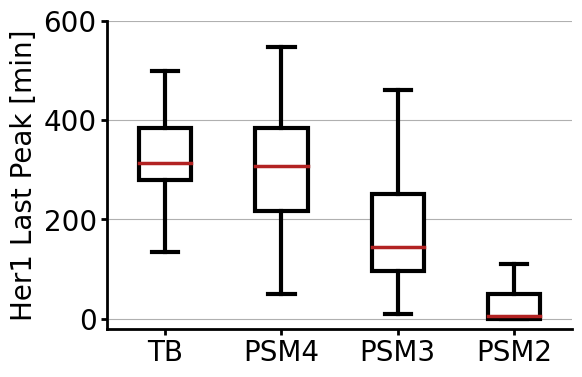

In [10]:
data = [TB_last_peak, PSM4_last_peak, PSM3_last_peak, PSM2_last_peak]
labels = ['TB', r'PSM4', r'PSM3', r'PSM2']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

boxprops = dict(linewidth=3, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=2.5, color='firebrick')
whiskerprops = dict(linewidth=3)
capprops = dict(linewidth=3)

bplot = ax.boxplot(data, patch_artist=True, boxprops=boxprops,
                  flierprops=flierprops, medianprops=medianprops,
                  whiskerprops=whiskerprops, capprops=capprops,showfliers=False);
ax.set_ylim([-20,600])
ax.set_yticks(np.arange(0,800,200));
ax.set_yticklabels(np.arange(0,800,200), fontsize=20);

ax.set_xticks(np.arange(1,5))
ax.set_xticklabels(labels, fontsize=20);

# customize boxplot
# fill with colors
colors = ['white']*4

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    

ax.yaxis.grid(True)

ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

ax.set_ylabel('Her1 Last Peak [min]', fontsize=20);

plt.show()

fig.savefig('../Data/Figure 3/Results/Boxplot-LastPeaks.pdf', bbox_inches='tight')

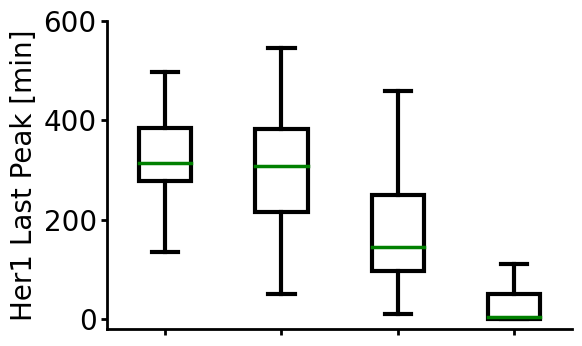

In [11]:
data = [TB_last_peak, PSM4_last_peak, PSM3_last_peak, PSM2_last_peak]
labels = ['TB', r'PSM4', r'PSM3', r'PSM2']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

boxprops = dict(linewidth=3, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=10,linestyle='none')
medianprops = dict(linewidth=2.5, color='green')
whiskerprops = dict(linewidth=3)
capprops = dict(linewidth=3)

bplot = ax.boxplot(data, patch_artist=True, boxprops=boxprops,
                  flierprops=flierprops, medianprops=medianprops,
                  whiskerprops=whiskerprops, capprops=capprops,showfliers=False);
ax.set_ylim([-20,600])
ax.set_yticks(np.arange(0,800,200));
ax.set_yticklabels(np.arange(0,800,200), fontsize=20);

ax.set_xticks(np.arange(1,5))
ax.set_xticklabels([], fontsize=20);

# customize boxplot
# fill with colors
colors = ['white']*4

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    

ax.yaxis.grid(False)

ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

ax.set_ylabel('Her1 Last Peak [min]', fontsize=20);

plt.show()
fig.savefig('../../Figures Linked Alt Version Nov 2021/ABR_Edits/Her1LastPeak_TB-PSM4-3-2.pdf', bbox_inches='tight')

#### Why do we use confidence interval?

For the previous plot we used confidence interval instead of the mean and standard deviation since some of the data sets, like the data for PSM2, has a skewed distribution. 

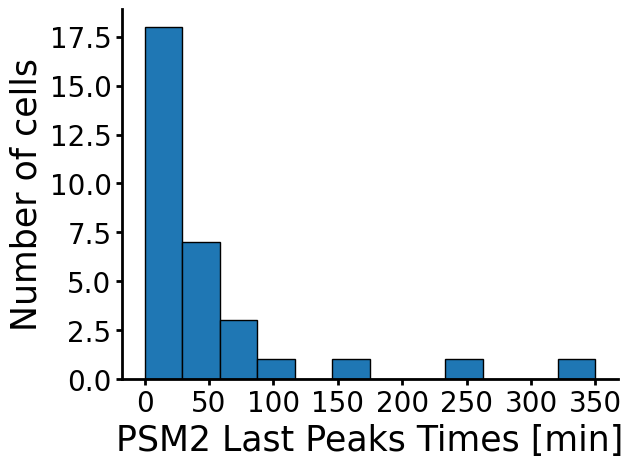

In [12]:
plt.hist(PSM2_last_peak, bins='fd', edgecolor='black')
plt.xlabel('PSM2 Last Peaks Times [min]', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

## Load the Looping and Mesp Data

<a id='mesp'></a>

If you want to go to the top of the notebook: [TOP](#top)

For each experiment, we have recorded the looping and mesp intensity. We are going to perform the same analysis as in figure 2: (1) Align the Mesp traces to the last Her 1 peak (2) Calculate the Mesp increase by comparing the initial and the final intensities (given a certain size window) (3) Using K-Means clustering obtain which are the Mesp traces with the highest increase (4) Calculate the onset of Mesp in those traces where Mesp increase was the highest

### Upload Mesp traces

In [13]:
PSM3_mesp = pd.read_excel('../Data/Figure 3/Fig3_Mesp_Int_Axis_checked.xlsx', sheet_name='PSM3', header=[0,1])
PSM4_mesp = pd.read_excel('../Data/Figure 3/Fig3_Mesp_Int_Axis_checked.xlsx', sheet_name='PSM4', header=[0,1])
TB_mesp = pd.read_excel('../Data/Figure 3/Fig3_Mesp_Int_Axis_checked.xlsx', sheet_name='TB', header=[0,1])

#### Arrange the data

In [14]:
mesp_ids = []
mesp_exps = []
for i in range(len(PSM4_mesp.keys())):
    if type(PSM4_mesp.keys()[i][1])==int:
        mesp_ids.append(PSM4_mesp.keys()[i][1])
        mesp_exps.append(PSM4_mesp.keys()[i][0])

In [15]:
# Save the traces in the same order as the Cells IDs and Experiments IDs
PSM3_m = []
PSM3_last_peaks_mesp = []
for i in range(len(PSM3_cells_id)):
    cell = PSM3_cells_id[i]
    exp = PSM3_exps_id[i]
    PSM3_m.append(PSM3_mesp[exp][cell].dropna().to_numpy())
    PSM3_last_peaks_mesp.append(PSM3[exp][cell][0])

In [16]:
# Save the traces in the same order as the Cells IDs and Experiments IDs
PSM4_m = []
PSM4_last_peaks_mesp = []
for i in range(len(mesp_ids)):
    # Avoid the IDS used for PSM2 - here we do not consider PSM2
    cell = mesp_ids[i]
    exp = mesp_exps[i]
    PSM4_m.append(PSM4_mesp[exp][cell].dropna().to_numpy())
    PSM4_last_peaks_mesp.append(PSM4[exp][cell][0])

In [17]:
# Save the traces in the same order as the Cells IDs and Experiments IDs
TB_m = []
TB_last_peaks_mesp = []
for i in range(len(TB_cells_id)):
    cell = TB_cells_id[i]
    exp = TB_exps_id[i]
    TB_m.append(TB_mesp[exp][cell].dropna().to_numpy())
    TB_last_peaks_mesp.append(TB[exp][cell][0])

## Mesp Distributions

### Plot the traces

As you can observe, some experiments have different backgroun levels (resulting from different days of data acquisition). However, the analysis that we will perform is not perturbed by this differences in background levels. 

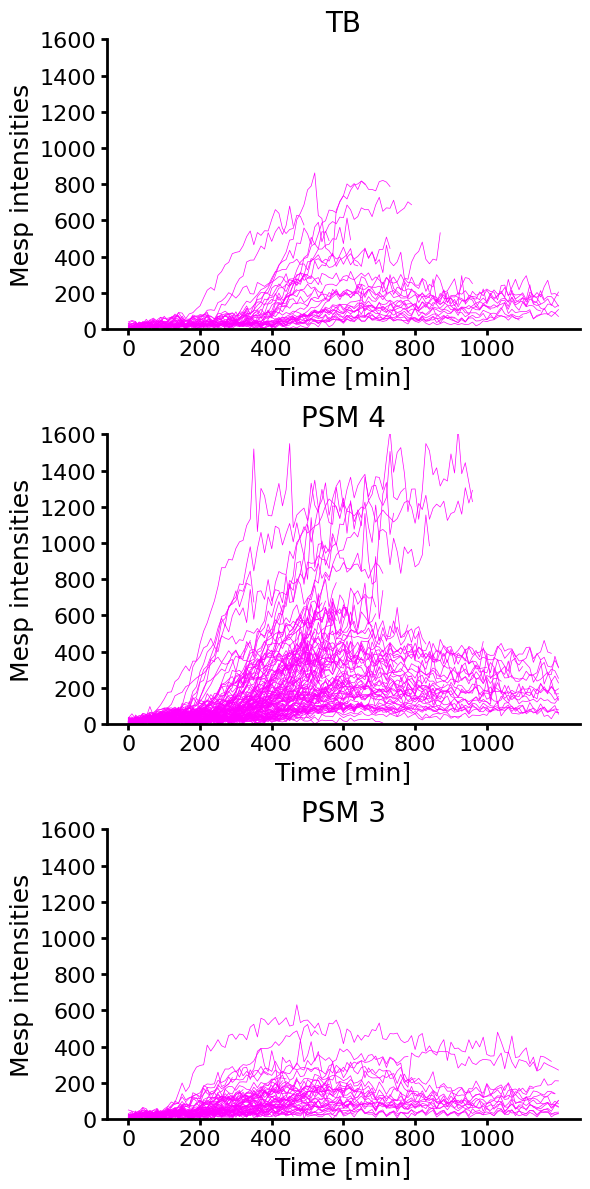

In [18]:
# Plot the results
tr = 10

plt.figure(figsize=[6,12])

plt.subplot(311)
for i in range(len(TB_cells_id)):
    plt.plot(TB_m[i]-np.min(TB_m[i]), color='magenta', linewidth=0.5)
plt.xticks(np.arange(0,120,20), map(int,np.arange(0,120,20)*tr), fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,1600])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('Mesp intensities', fontsize=18)
plt.title('TB', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(312)
for i in range(len(mesp_ids)):
    plt.plot(PSM4_m[i]-np.min(PSM4_m[i]), color='magenta', linewidth=0.5)
plt.xticks(np.arange(0,120,20), map(int,np.arange(0,120,20)*tr), fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,1600])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('Mesp intensities', fontsize=18)
plt.title('PSM 4', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(313)
for i in range(len(PSM3_cells_id)):
    plt.plot(PSM3_m[i]-np.min(PSM3_m[i]), color='magenta', linewidth=0.5)
plt.xticks(np.arange(0,120,20), map(int,np.arange(0,120,20)*tr), fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,1600])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('Mesp intensities', fontsize=18)
plt.title('PSM 3', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.tight_layout()
plt.show()

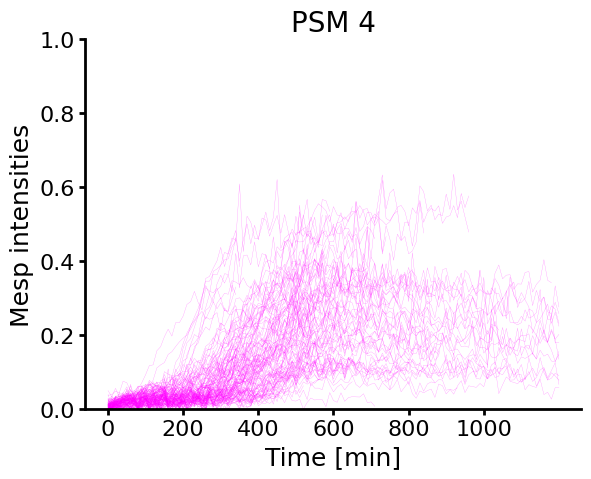

In [19]:

    

for i in range(len(mesp_ids)):
    plt.plot(np.arange(len(PSM4_m[i]))*tr, (PSM4_m[i]-np.min(PSM4_m[i]))/np.max(PSM4_m[i]), color='magenta', alpha=0.5, linewidth=0.2)
    
plt.xticks(np.arange(0,120,20)*tr, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0,1])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('Mesp intensities', fontsize=18)
plt.title('PSM 4', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

## Last peak position of her 1

We use the "adjusted" peak values since the data has been aligned according to the seeding time in the dish. 

### Align by the last peak

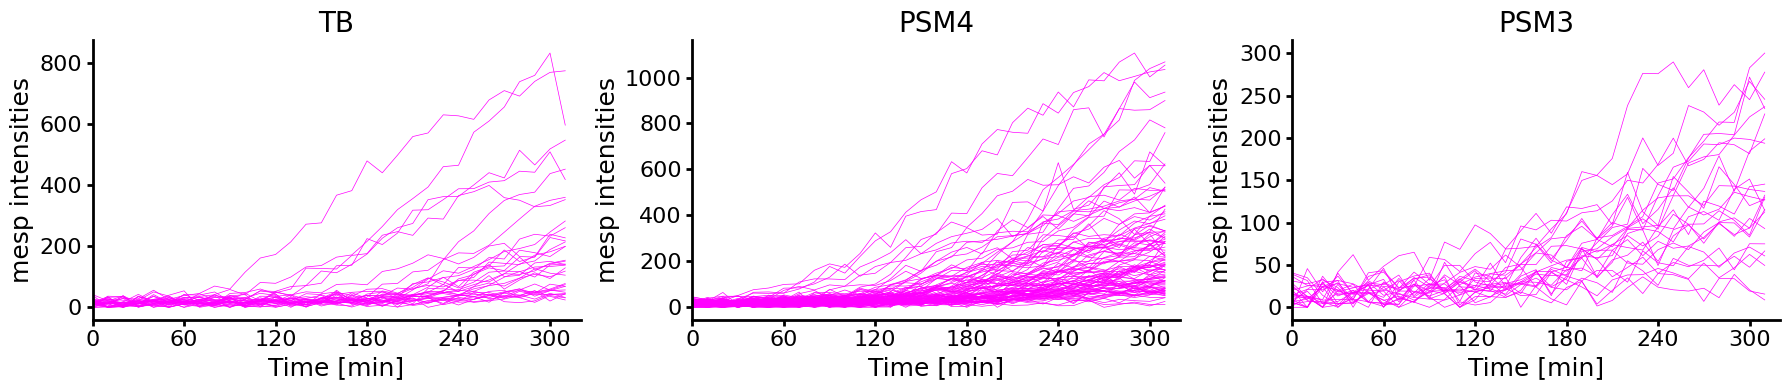

In [20]:
# Plot the results
tr = 10


plt.figure(figsize=[18,4])

PSM3_mesp_aligned = []
PSM4_mesp_aligned = []
TB_mesp_aligned = []
TB_st = []
PSM4_st = []
PSM3_st = []
TB_lp = []
PSM4_lp = []
PSM3_lp = []

cut_off_val1 = 160 # in minutes --> Stop time
cut_off_val2 = 160 # in minutes --> Start time

len_traces = (cut_off_val1+cut_off_val2)//tr

plt.subplot(131)
for i in range(len(TB_cells_id)):
    ind_temp = int(TB_last_peaks_mesp[i]/tr)
    intensities = TB_m[i][~np.isnan(TB_m[i])]
    
    # Find the last peak
    stop_time = ind_temp+int(cut_off_val1/tr) # We have it in frames, not in minutes! 
    start_time = ind_temp-int(cut_off_val2/tr)
    
    if start_time>0:
        intensities_ = intensities[start_time:stop_time]
        if np.count_nonzero(~np.isnan(intensities_)) == len_traces:

            plt.plot(intensities[start_time:stop_time]-np.min(intensities[start_time:stop_time]),
                    color='magenta', linewidth=0.5)
            TB_mesp_aligned.append(intensities[start_time:stop_time])
            TB_st.append(start_time)
            TB_lp.append(TB_last_peaks_mesp[i])
        
plt.xticks(np.arange(0,38,6), map(int,np.arange(0,38,6)*tr), fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0,32])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('mesp intensities', fontsize=18)
plt.title('TB', fontsize=20)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.subplot(132)
for i in range(len(mesp_ids)):
    ind_temp = int(PSM4_last_peaks_mesp[i]/tr)
    intensities = PSM4_m[i][~np.isnan(PSM4_m[i])]
    
    # Find the last peak
    stop_time = ind_temp+int(cut_off_val1/tr) # We have it in frames, not in minutes! 
    start_time = ind_temp-int(cut_off_val2/tr)
    if start_time>0:
        intensities_ = intensities[start_time:stop_time]
        if np.count_nonzero(~np.isnan(intensities_)) == len_traces:

            plt.plot(intensities[start_time:stop_time]-np.min(intensities[start_time:stop_time]),
                    color='magenta', linewidth=0.5)
            PSM4_mesp_aligned.append(intensities[start_time:stop_time])
            PSM4_st.append(start_time)
            PSM4_lp.append(PSM4_last_peaks_mesp[i])
        
plt.xticks(np.arange(0,38,6), map(int,np.arange(0,38,6)*tr), fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0,32])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('mesp intensities', fontsize=18)
plt.title('PSM4', fontsize=20)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.subplot(133)
for i in range(len(PSM3_cells_id)):
    ind_temp = int(PSM3_last_peaks_mesp[i]/tr)
    intensities = PSM3_m[i][~np.isnan(PSM3_m[i])]
    
    # Find the last peak
    stop_time = ind_temp+int(cut_off_val1/tr) # We have it in frames, not in minutes! 
    start_time = ind_temp-int(cut_off_val2/tr)
    if start_time>0:
        intensities_ = intensities[start_time:stop_time]
        if np.count_nonzero(~np.isnan(intensities_)) == len_traces:

            plt.plot(intensities[start_time:stop_time]-np.min(intensities[start_time:stop_time]),
                    color='magenta', linewidth=0.5)
            PSM3_mesp_aligned.append(intensities[start_time:stop_time])
            PSM3_st.append(start_time)
            PSM3_lp.append(PSM3_last_peaks_mesp[i])
        
plt.xticks(np.arange(0,38,6), map(int,np.arange(0,38,6)*tr), fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0,32])
plt.xlabel('Time [min]', fontsize=18)
plt.ylabel('mesp intensities', fontsize=18)
plt.title('PSM3', fontsize=20)

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

plt.tight_layout()
plt.show()

## Mesp Amplitude fold change

In [21]:
def ratio_mesp(window, intensities):
        
    # Compute the areas
    area1 = np.abs(np.mean(intensities[:window]))
    area2 = np.mean(intensities[-window:])

    # Compute the ratio
    ratio = area2 - area1
    
    return ratio

In [22]:
window = 5

ratio4 = []
for i in range(len(PSM4_mesp_aligned)):
       
    # Intensity values of cropped Mesp tracks
    intensities = PSM4_mesp_aligned[i]

    ratio4.append(ratio_mesp(window, intensities))
    
ratio3 = []
for i in range(len(PSM3_mesp_aligned)):
       
    # Intensity values of Mesp tracks
    intensities = PSM3_mesp_aligned[i]

    ratio3.append(ratio_mesp(window, intensities))
    
ratioTB = []
for i in range(len(TB_mesp_aligned)):
       
    # Intensity values of Mesp tracks
    intensities = TB_mesp_aligned[i]

    ratioTB.append(ratio_mesp(window, intensities))


### Classify using K-Means

### Which are the three classified groups?

Group 1: 5.88 and Group 2: 14.71 and Group 3: 79.41
Group 1: 5.94 and Group 2: 59.41 and Group 3: 34.65
Group 1: 41.67 and Group 2: 25.00 and Group 3: 33.33


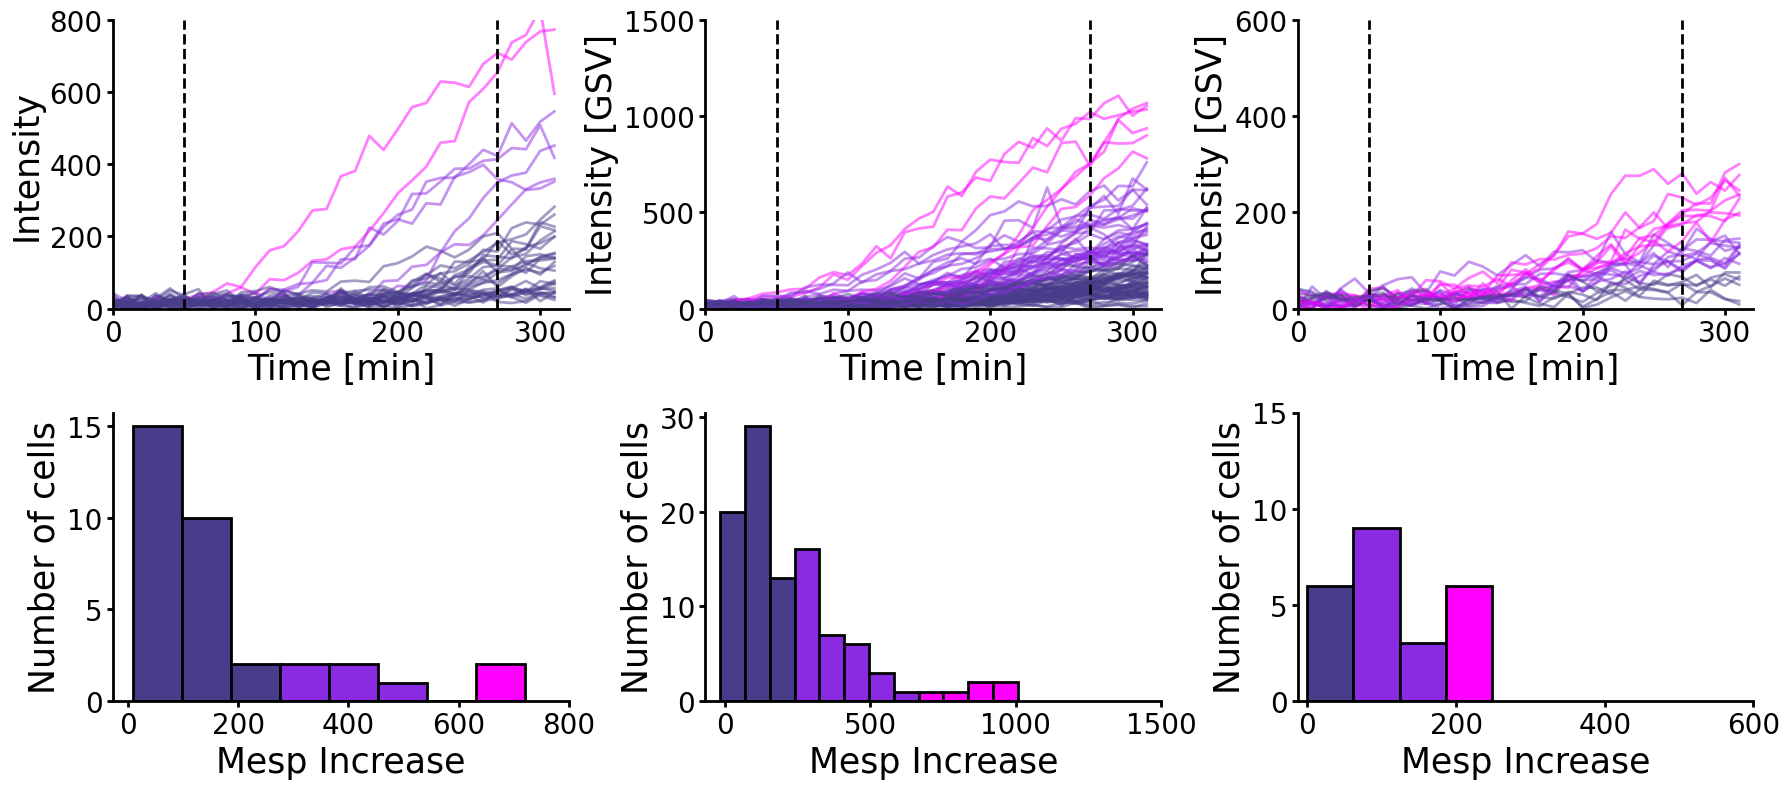

In [23]:
# Distributions

fig = plt.figure(figsize=[18,8])

n_clusters = 3

# Remove nans
intensities_mesp_lp_plot = TB_mesp_aligned
ratio1_ = np.array(ratioTB)

plt.subplot(231)
window = 5
count = 0

#color = ['navy', 'deepskyblue', 'royalblue']
color = ['darkslateblue','blueviolet','magenta']

X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==1)[0]
group2 = np.where(y_pred1==2)[0]

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])

for i in range(len(intensities_mesp_lp_plot)):   
    plt.plot(intensities_mesp_lp_plot[i]-np.min(intensities_mesp_lp_plot[i]), c=color[y_pred1[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.xlabel('Time [min]',fontsize=25)
locs, labels = plt.xticks()
plt.xticks(np.arange(0,len_traces+10,10), np.arange(0,len_traces+10,10)*tr, fontsize=20)
plt.xlim([0,len_traces])
plt.yticks(np.arange(0,1000,200), fontsize=20)
plt.ylim([0,800])
plt.ylabel('Intensity',fontsize=25)
#plt.title('TB', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

# -----------------------------------------
intensities_mesp_lp_plot = PSM4_mesp_aligned
ratio1_ = np.array(ratio4)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==1)[0]
group2 = np.where(y_pred1==2)[0]

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])

plt.subplot(232)
#color = ['royalblue','navy','deepskyblue']
color = ['blueviolet','darkslateblue','magenta']

window = 5
count = 0
for i in range(len(intensities_mesp_lp_plot)):   
    plt.plot(intensities_mesp_lp_plot[i]-np.min(intensities_mesp_lp_plot[i]), c=color[y_pred1[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.xlabel('Time [min]',fontsize=25)
locs, labels = plt.xticks()
plt.xticks(np.arange(0,len_traces+10,10), np.arange(0,len_traces+10,10)*tr, fontsize=20)
plt.xlim([0,len_traces])
plt.yticks(np.arange(0,1600,500), fontsize=20)
plt.ylim([0,1500])
plt.ylabel('Intensity [GSV]',fontsize=25)
# plt.title('PSM4', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


# -----------------------------------------
intensities_mesp_lp_plot = PSM3_mesp_aligned
ratio1_ = np.array(ratio3)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==1)[0]
group2 = np.where(y_pred1==2)[0]

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])

plt.subplot(233)
#color = ['royalblue', 'deepskyblue', 'navy']
color = ['magenta', 'darkslateblue','blueviolet']

window = 5
count = 0
for i in range(len(intensities_mesp_lp_plot)):   
    plt.plot(intensities_mesp_lp_plot[i]-np.min(intensities_mesp_lp_plot[i]), c=color[y_pred1[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.xlabel('Time [min]',fontsize=25)
locs, labels = plt.xticks()
plt.xticks(np.arange(0,len_traces+10,10), np.arange(0,len_traces+10,10)*tr, fontsize=20)
plt.xlim([0,len_traces])
plt.yticks(np.arange(0,800,200), fontsize=20)
plt.ylim([0,600])
plt.ylabel('Intensity [GSV]',fontsize=25)
#plt.title('PSM3', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

# --------------------------------
plt.subplot(234)
#color = ['navy', 'deepskyblue', 'royalblue']
color = ['darkslateblue', 'magenta', 'blueviolet']

ratio1_ = np.array(ratioTB)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==2)[0]
group2 = np.where(y_pred1==1)[0]
group3 = np.where(y_pred1==0)[0]

total = len(group1)+len(group2)+len(group3)
group1_per = (len(group1)/total)*100
group2_per = (len(group2)/total)*100
group3_per = (len(group3)/total)*100
print('Group 1: %.2f and Group 2: %.2f and Group 3: %.2f'%(group1_per, group2_per, group3_per))

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])
val3 = np.min(ratio1_[group3])
th = np.sort([val1, val2,val3])

N, bins, patches = plt.hist(ratio1_, edgecolor='black', linewidth=2, bins='fd')
#plt.hist(ratio1_, edgecolor='black', color='gray', bins='fd', linewidth=2)
ind1 = np.argmin((th[1]-bins)**2)
ind2 = np.argmin((th[2]-bins)**2)

for i in range(0,ind1):
    patches[i].set_facecolor(color[0])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color[2])
for i in range(ind2-1, len(patches)):
    patches[i].set_facecolor(color[1])


plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,1000,200), fontsize=20)
plt.yticks(np.arange(0,16,5), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

# --------------------------------
plt.subplot(235)
#color = ['royalblue','navy','deepskyblue']
color = ['blueviolet', 'darkslateblue', 'magenta']


ratio1_ = np.array(ratio4)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==2)[0]
group2 = np.where(y_pred1==1)[0]
group3 = np.where(y_pred1==0)[0]

total = len(group1)+len(group2)+len(group3)
group1_per = (len(group1)/total)*100
group2_per = (len(group2)/total)*100
group3_per = (len(group3)/total)*100
print('Group 1: %.2f and Group 2: %.2f and Group 3: %.2f'%(group1_per, group2_per, group3_per))

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])
val3 = np.min(ratio1_[group3])
th = np.sort([val1, val2,val3])


N, bins, patches = plt.hist(ratio1_, edgecolor='black', linewidth=2, bins='fd')
#plt.hist(ratio1_, edgecolor='black', color='gray', bins='fd', linewidth=2)
ind1 = np.argmin((th[1]-bins)**2)
ind2 = np.argmin((th[2]-bins)**2)

for i in range(0,ind1):
    patches[i].set_facecolor(color[1])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color[0])
for i in range(ind2, len(patches)):
    patches[i].set_facecolor(color[2])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,1600,500), fontsize=20)
plt.yticks(np.arange(0,40,10), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
                   
# --------------------------------
plt.subplot(236)
#color = ['royalblue', 'deepskyblue', 'navy']
color = ['blueviolet', 'magenta','darkslateblue']

ratio1_ = np.array(ratio3)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==2)[0]
group2 = np.where(y_pred1==1)[0]
group3 = np.where(y_pred1==0)[0]

total = len(group1)+len(group2)+len(group3)
group1_per = (len(group1)/total)*100
group2_per = (len(group2)/total)*100
group3_per = (len(group3)/total)*100
print('Group 1: %.2f and Group 2: %.2f and Group 3: %.2f'%(group1_per, group2_per, group3_per))

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])
val3 = np.min(ratio1_[group3])
th = np.sort([val1, val2, val3])

N, bins, patches = plt.hist(ratio1_, edgecolor='black', linewidth=2, bins='fd')

ind1 = np.argmin((th[1]-bins)**2)
ind2 = np.argmin((th[2]-bins)**2)

for i in range(0,ind1):
    patches[i].set_facecolor(color[2])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color[0])
for i in range(ind2, len(patches)):
    patches[i].set_facecolor(color[1])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,700,200), fontsize=20)
plt.yticks(np.arange(0,16,5), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


plt.tight_layout()
plt.show()

fig.savefig('../Data/Figure S3/Results/ClusteredKMeans-FoldChangeMesp-TBPSM43.pdf', format='pdf', bbox_inches='tight')

#### Same plot as before but with individual plots instead of subplots

Group 1: 5.88 and Group 2: 14.71 and Group 3: 79.41
Group 1: 5.94 and Group 2: 59.41 and Group 3: 34.65
Group 1: 41.67 and Group 2: 25.00 and Group 3: 33.33


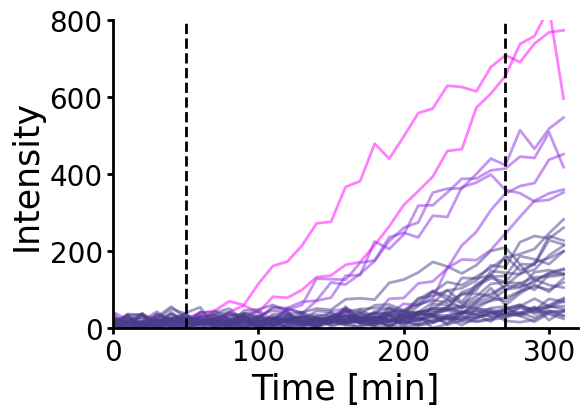

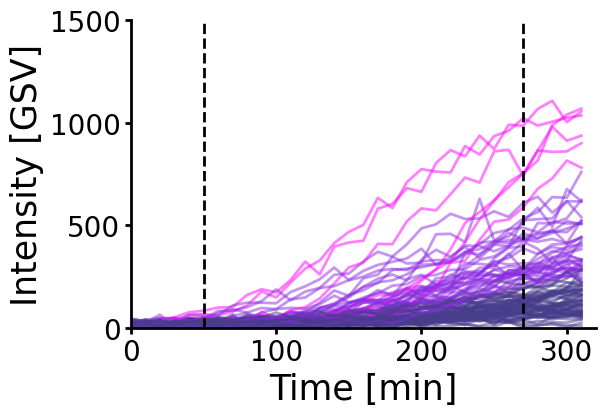

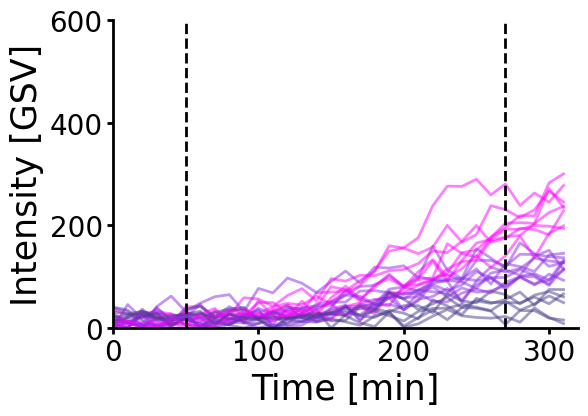

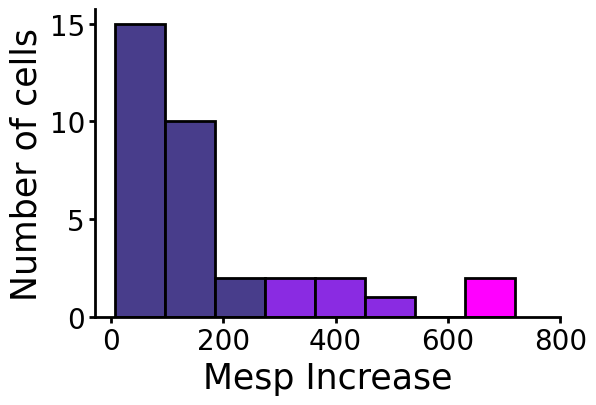

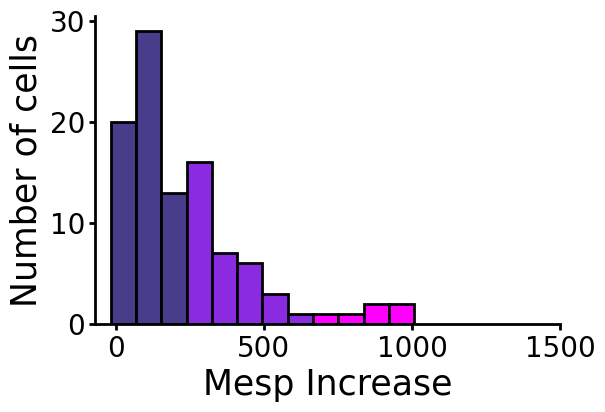

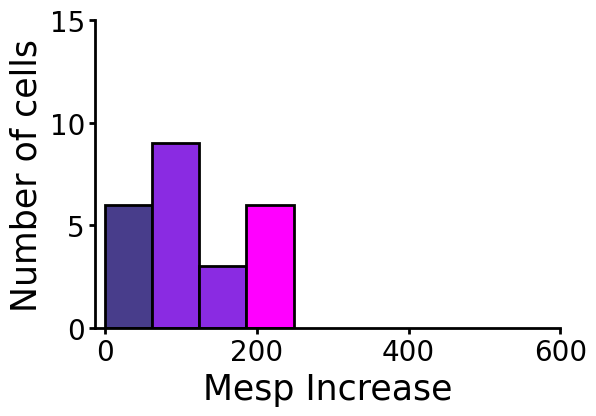

In [24]:
# Distributions

fig = plt.figure(figsize=[6,4])

n_clusters = 3

# Remove nans
intensities_mesp_lp_plot = TB_mesp_aligned
ratio1_ = np.array(ratioTB)

window = 5
count = 0

#color = ['navy', 'deepskyblue', 'royalblue']
color = ['darkslateblue','blueviolet', 'magenta']

X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==1)[0]
group2 = np.where(y_pred1==2)[0]

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])

for i in range(len(intensities_mesp_lp_plot)):   
    plt.plot(intensities_mesp_lp_plot[i]-np.min(intensities_mesp_lp_plot[i]), c=color[y_pred1[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.xlabel('Time [min]',fontsize=25)
locs, labels = plt.xticks()
plt.xticks(np.arange(0,len_traces+10,10), np.arange(0,len_traces+10,10)*tr, fontsize=20)
plt.xlim([0,len_traces])
plt.yticks(np.arange(0,1000,200), fontsize=20)
plt.ylim([0,800])
plt.ylabel('Intensity',fontsize=25)
#plt.title('TB', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S3/Results/ClusteredKMeansTraces-TB.pdf', format='pdf', bbox_inches='tight')

# -----------------------------------------

fig = plt.figure(figsize=[6,4])

intensities_mesp_lp_plot = PSM4_mesp_aligned
ratio1_ = np.array(ratio4)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==1)[0]
group2 = np.where(y_pred1==2)[0]

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])

#color = ['royalblue','navy','deepskyblue']
color = ['blueviolet','darkslateblue','magenta']

window = 5
count = 0
for i in range(len(intensities_mesp_lp_plot)):   
    plt.plot(intensities_mesp_lp_plot[i]-np.min(intensities_mesp_lp_plot[i]), c=color[y_pred1[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.xlabel('Time [min]',fontsize=25)
locs, labels = plt.xticks()
plt.xticks(np.arange(0,len_traces+10,10), np.arange(0,len_traces+10,10)*tr, fontsize=20)
plt.xlim([0,len_traces])
plt.yticks(np.arange(0,1600,500), fontsize=20)
plt.ylim([0,1500])
plt.ylabel('Intensity [GSV]',fontsize=25)
# plt.title('PSM4', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S3/Results/ClusteredKMeansTraces-PSM4.pdf', format='pdf', bbox_inches='tight')


# -----------------------------------------

fig = plt.figure(figsize=[6,4])

intensities_mesp_lp_plot = PSM3_mesp_aligned
ratio1_ = np.array(ratio3)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==1)[0]
group2 = np.where(y_pred1==2)[0]

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])

#color = ['royalblue', 'deepskyblue', 'navy']
color = ['magenta', 'darkslateblue', 'blueviolet']

window = 5
count = 0
for i in range(len(intensities_mesp_lp_plot)):   
    plt.plot(intensities_mesp_lp_plot[i]-np.min(intensities_mesp_lp_plot[i]), c=color[y_pred1[count]],alpha=0.5, linewidth=2) 
    count+=1
        
plt.axvline(window, color='k', linewidth=2, linestyle='--')
plt.axvline(len_traces-window, color='k', linewidth=2, linestyle='--')

plt.xlabel('Time [min]',fontsize=25)
locs, labels = plt.xticks()
plt.xticks(np.arange(0,len_traces+10,10), np.arange(0,len_traces+10,10)*tr, fontsize=20)
plt.xlim([0,len_traces])
plt.yticks(np.arange(0,800,200), fontsize=20)
plt.ylim([0,600])
plt.ylabel('Intensity [GSV]',fontsize=25)
#plt.title('PSM3', fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S3/Results/ClusteredKMeansTraces-PSM3.pdf', format='pdf', bbox_inches='tight')

# --------------------------------
fig = plt.figure(figsize=[6,4])

#color = ['navy', 'deepskyblue', 'royalblue']
color = ['darkslateblue', 'magenta', 'blueviolet']

ratio1_ = np.array(ratioTB)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==2)[0]
group2 = np.where(y_pred1==1)[0]
group3 = np.where(y_pred1==0)[0]

total = len(group1)+len(group2)+len(group3)
group1_per = (len(group1)/total)*100
group2_per = (len(group2)/total)*100
group3_per = (len(group3)/total)*100
print('Group 1: %.2f and Group 2: %.2f and Group 3: %.2f'%(group1_per, group2_per, group3_per))

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])
val3 = np.min(ratio1_[group3])
th = np.sort([val1, val2,val3])


N, bins, patches = plt.hist(ratio1_, edgecolor='black', linewidth=2, bins='fd')
#plt.hist(ratio1_, edgecolor='black', color='gray', bins='fd', linewidth=2)
ind1 = np.argmin((th[1]-bins)**2)
ind2 = np.argmin((th[2]-bins)**2)

for i in range(0,ind1):
    patches[i].set_facecolor(color[0])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color[2])
for i in range(ind2-1, len(patches)):
    patches[i].set_facecolor(color[1])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,1000,200), fontsize=20)
plt.yticks(np.arange(0,16,5), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S3/Results/ClusteredKMeansDistributions-TB.pdf', format='pdf', bbox_inches='tight')

# --------------------------------
fig = plt.figure(figsize=[6,4])

#color = ['royalblue','navy','deepskyblue']
color = ['blueviolet', 'darkslateblue', 'magenta']


ratio1_ = np.array(ratio4)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==2)[0]
group2 = np.where(y_pred1==1)[0]
group3 = np.where(y_pred1==0)[0]

total = len(group1)+len(group2)+len(group3)
group1_per = (len(group1)/total)*100
group2_per = (len(group2)/total)*100
group3_per = (len(group3)/total)*100
print('Group 1: %.2f and Group 2: %.2f and Group 3: %.2f'%(group1_per, group2_per, group3_per))

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])
val3 = np.min(ratio1_[group3])
th = np.sort([val1, val2,val3])


N, bins, patches = plt.hist(ratio1_, edgecolor='black', linewidth=2, bins='fd')
#plt.hist(ratio1_, edgecolor='black', color='gray', bins='fd', linewidth=2)
ind1 = np.argmin((th[1]-bins)**2)
ind2 = np.argmin((th[2]-bins)**2)

for i in range(0,ind1):
    patches[i].set_facecolor(color[1])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color[0])
for i in range(ind2, len(patches)):
    patches[i].set_facecolor(color[2])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,1600,500), fontsize=20)
plt.yticks(np.arange(0,40,10), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
                   
fig.savefig('../Data/Figure S3/Results/ClusteredKMeansDistributions-PSM4.pdf', format='pdf', bbox_inches='tight')

# --------------------------------
fig = plt.figure(figsize=[6,4])

#color = ['royalblue', 'deepskyblue', 'navy']
color = ['blueviolet', 'magenta','darkslateblue']

ratio1_ = np.array(ratio3)
X = np.array(ratio1_).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred1 = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

group1 = np.where(y_pred1==2)[0]
group2 = np.where(y_pred1==1)[0]
group3 = np.where(y_pred1==0)[0]

total = len(group1)+len(group2)+len(group3)
group1_per = (len(group1)/total)*100
group2_per = (len(group2)/total)*100
group3_per = (len(group3)/total)*100
print('Group 1: %.2f and Group 2: %.2f and Group 3: %.2f'%(group1_per, group2_per, group3_per))

val1 = np.min(ratio1_[group1])
val2 = np.min(ratio1_[group2])
val3 = np.min(ratio1_[group3])
th = np.sort([val1, val2, val3])

N, bins, patches = plt.hist(ratio1_, edgecolor='black', linewidth=2, bins='fd')

ind1 = np.argmin((th[1]-bins)**2)
ind2 = np.argmin((th[2]-bins)**2)

for i in range(0,ind1):
    patches[i].set_facecolor(color[2])
for i in range(ind1,ind2):    
    patches[i].set_facecolor(color[0])
for i in range(ind2, len(patches)):
    patches[i].set_facecolor(color[1])

plt.xlabel('Mesp Increase', fontsize=25)
plt.ylabel('Number of cells', fontsize=25)
plt.xticks(np.arange(0,700,200), fontsize=20)
plt.yticks(np.arange(0,16,5), fontsize=20)
ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

fig.savefig('../Data/Figure S3/Results/ClusteredKMeansDistributions-PSM3.pdf', format='pdf', bbox_inches='tight')

## Mesp onset vs her1 last peak time

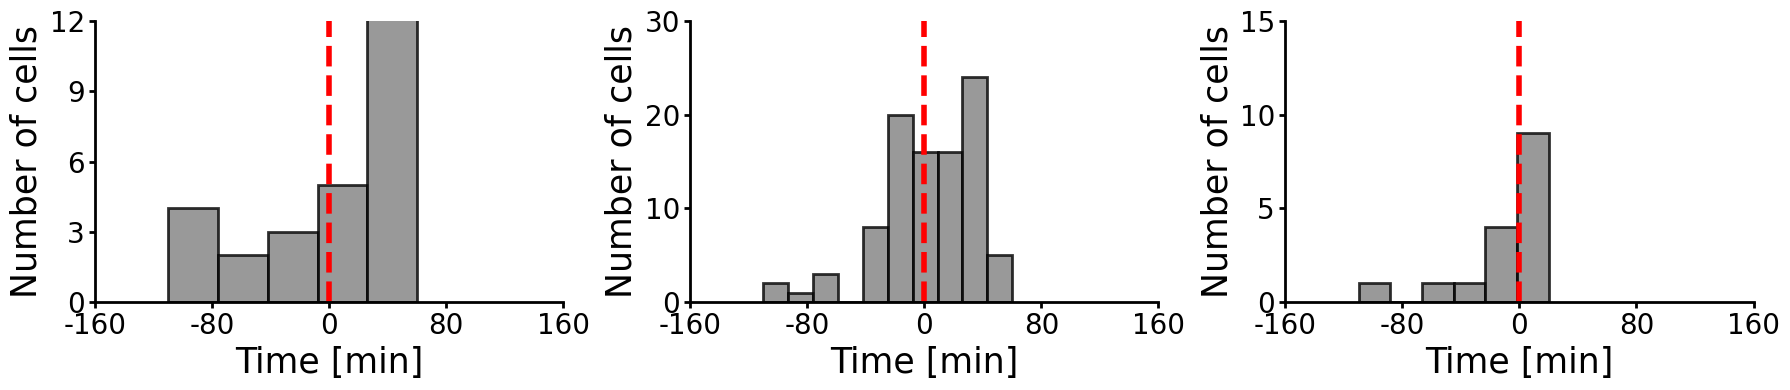

In [25]:
fig = plt.figure(figsize=[18,4])

ratio = np.array(ratioTB)
intensities_mesp_lp = TB_mesp_aligned
onset_mesp_TB = []
onset_lp_TB = []

window = 5

X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

# Find the maximum fold change for each group
max1 = np.max(ratio[np.where(y_pred==0)[0]])
max2 = np.max(ratio[np.where(y_pred==1)[0]])
max3 = np.max(ratio[np.where(y_pred==2)[0]])

# Find the two groups where the fold change is highest
inds = np.argsort([max1,max2,max3])[:2]

# Find the positions where those values are in the ratio
ind_mesp = np.concatenate((np.where(y_pred==inds[0])[0], \
                           np.where(y_pred==inds[1])[0]))

onset_mesp = []
for i in ind_mesp:

    X = np.zeros((len(intensities_mesp_lp[i][window:]),2))
    X[:,0] = intensities_mesp_lp[i][window:]
    X[:,1] = intensities_mesp_lp[i][:-window]
    y_pred = KMeans(n_clusters=2, n_init=100).fit_predict(X)

    ind_cut = np.where(y_pred[window:]==y_pred[-1])[0]+window
    onset_mesp.append(ind_cut[0]*tr)
    onset_mesp_TB.append(ind_cut[0]*tr+TB_st[i]*tr)
    onset_lp_TB.append(TB_lp[i])


plt.subplot(131)
plt.hist(onset_mesp, bins='fd', linewidth=2, edgecolor='black', color='grey', alpha=0.8, density=False);

# Mean values plotted as dashed lines
plt.axvline(160, color='red', linewidth=4, linestyle='--', alpha=1)
#plt.axvline(np.mean(last_peak), color='darkgreen', linewidth=4, linestyle='--', alpha=1)


plt.xlabel('Time [min]',fontsize=25)
plt.ylabel('Number of cells',fontsize=25)
plt.xticks(np.arange(0,360,80), np.arange(-160,240,80), fontsize=20)
plt.yticks(np.arange(0,14,3), fontsize=20)
plt.xlim([0,320])
plt.ylim([0,12])
#plt.title('TB', fontsize=20)
#plt.ylim([0,1])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)

# --------------------------------
ratio = np.array(ratio4)
intensities_mesp_lp = PSM4_mesp_aligned
onset_lp_PSM4 = []
window = 5

X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

# Find the maximum fold change for each group
max1 = np.max(ratio[np.where(y_pred==0)[0]])
max2 = np.max(ratio[np.where(y_pred==1)[0]])
max3 = np.max(ratio[np.where(y_pred==2)[0]])

# Find the two groups where the fold change is highest
inds = np.argsort([max1,max2,max3])[:2]

# Find the positions where those values are in the ratio
ind_mesp = np.concatenate((np.where(y_pred==inds[0])[0], \
                           np.where(y_pred==inds[1])[0]))

onset_mesp_PSM4 = []
onset_mesp = []
for i in ind_mesp:

    X = np.zeros((len(intensities_mesp_lp[i][window:]),2))
    X[:,0] = intensities_mesp_lp[i][window:]
    X[:,1] = intensities_mesp_lp[i][:-window]
    y_pred = KMeans(n_clusters=2, n_init=100).fit_predict(X)

    ind_cut = np.where(y_pred[window:]==y_pred[-1])[0]+window
    onset_mesp.append(ind_cut[0]*tr)
    onset_mesp_PSM4.append(ind_cut[0]*tr+PSM4_st[i]*tr)
    onset_lp_PSM4.append(PSM4_lp[i])


plt.subplot(132)
plt.hist(onset_mesp, bins='fd', linewidth=2, edgecolor='black', color='grey', alpha=0.8, density=False);

# Mean values plotted as dashed lines
plt.axvline(160, color='red', linewidth=4, linestyle='--', alpha=1)
#plt.axvline(np.mean(last_peak), color='darkgreen', linewidth=4, linestyle='--', alpha=1)


plt.xlabel('Time [min]',fontsize=25)
plt.ylabel('Number of cells',fontsize=25)
plt.xticks(np.arange(0,360,80), np.arange(-160,240,80), fontsize=20)
plt.yticks(np.arange(0,35, 10), fontsize=20)
plt.ylim([0,30])
plt.xlim([0,320])
#plt.title('PSM4', fontsize=20)
#plt.ylim([0,1])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)


# --------------------------------
ratio = np.array(ratio3)
intensities_mesp_lp = PSM3_mesp_aligned
onset_lp_PSM3 = []
onset_mesp_PSM3 = []

window = 5

X = np.array(ratio).reshape(-1, 1)
X[np.where(np.isnan(X))] = 0 # In case there is any nan
y_pred = KMeans(n_clusters=n_clusters, n_init=200, random_state=1).fit_predict(X)

# Find the maximum fold change for each group
max1 = np.max(ratio[np.where(y_pred==0)[0]])
max2 = np.max(ratio[np.where(y_pred==1)[0]])
max3 = np.max(ratio[np.where(y_pred==2)[0]])

# Find the two groups where the fold change is highest
inds = np.argsort([max1,max2,max3])[:2]

# Find the positions where those values are in the ratio
ind_mesp = np.concatenate((np.where(y_pred==inds[0])[0], \
                           np.where(y_pred==inds[1])[0]))

onset_mesp = []
for i in ind_mesp:

    X = np.zeros((len(intensities_mesp_lp[i][window:]),2))
    X[:,0] = intensities_mesp_lp[i][window:]
    X[:,1] = intensities_mesp_lp[i][:-window]
    y_pred = KMeans(n_clusters=2, n_init=100).fit_predict(X)

    ind_cut = np.where(y_pred[window:]==y_pred[-1])[0]+window
    onset_mesp.append(ind_cut[0]*tr)
    onset_mesp_PSM3.append(ind_cut[0]*tr+PSM3_st[i]*tr)
    onset_lp_PSM3.append(PSM3_lp[i])


plt.subplot(133)
plt.hist(onset_mesp, bins='fd', linewidth=2, edgecolor='black', color='grey', alpha=0.8, density=False);

# Mean values plotted as dashed lines
plt.axvline(160, color='red', linewidth=4, linestyle='--', alpha=1)
#plt.axvline(np.mean(last_peak), color='darkgreen', linewidth=4, linestyle='--', alpha=1)


plt.xlabel('Time [min]',fontsize=25)
plt.ylabel('Number of cells',fontsize=25)
plt.xticks(np.arange(0,360,80), np.arange(-160,240,80), fontsize=20)
plt.yticks(np.arange(0,16,5), fontsize=20)
plt.xlim([0,320])
plt.ylim([0,15])
#lt.title('PSM3', fontsize=20)
#plt.ylim([0,1])

ax = plt.gca()
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)



plt.tight_layout()
plt.show()
fig.savefig('../Data/Figure S3/Results/MespOnset-AlignedTraces.pdf', format='pdf', bbox_inches='tight')

In [26]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

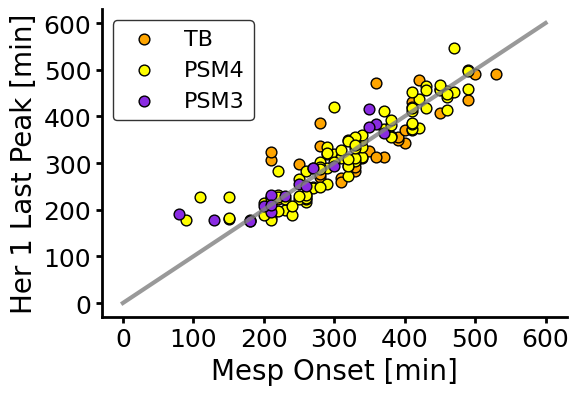

In [27]:
fig = plt.figure(figsize=[6,4])
plt.scatter(onset_mesp_TB, onset_lp_TB, color='orange', label='TB', edgecolor='black', s=60, alpha=1)
plt.scatter(onset_mesp_PSM4, onset_lp_PSM4, color='yellow', label=r'PSM4', edgecolor='black', s=60, alpha=1)
plt.scatter(onset_mesp_PSM3, onset_lp_PSM3, color='blueviolet', label='PSM3', edgecolor='black', s=60, alpha=1)
            
plt.xlabel('Mesp Onset [min]', fontsize=20)
plt.ylabel('Her 1 Last Peak [min]', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=16, edgecolor='black')

plt.plot([0, 600], [0, 600], '-', color='grey', linewidth=3,alpha=0.8)

ax = plt.gca() 
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.show()

fig.savefig('../Data/Figure 3/Results/Correlations.pdf', bbox_inches='tight')

/var/folders/2l/h59mrhk92pz9k6xp9z18ghqr0000gn/T/ipykernel_40374/488883209.py:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(onset_mesp_TB, onset_lp_TB,
/var/folders/2l/h59mrhk92pz9k6xp9z18ghqr0000gn/T/ipykernel_40374/488883209.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0, 600], [0, 600], '-', color='mediumvioletred', linewidth=3,alpha=0.8, linestyle='dashed')


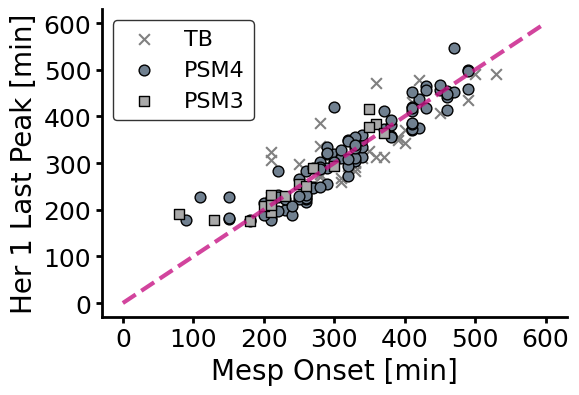

In [28]:
fig = plt.figure(figsize=[6,4])
plt.scatter(onset_mesp_TB, onset_lp_TB, 
            color='grey', label='TB', edgecolor='black', s=60, alpha=1, marker='x')
plt.scatter(onset_mesp_PSM4, onset_lp_PSM4, 
            color='slategrey', label=r'PSM4', edgecolor='black', s=60, alpha=1, marker='o')
plt.scatter(onset_mesp_PSM3, onset_lp_PSM3, 
            color='darkgrey', label='PSM3', edgecolor='black', s=60, alpha=1, marker='s')
            
plt.xlabel('Mesp Onset [min]', fontsize=20)
plt.ylabel('Her 1 Last Peak [min]', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='best', fontsize=16, edgecolor='black')

plt.plot([0, 600], [0, 600], '-', color='mediumvioletred', linewidth=3,alpha=0.8, linestyle='dashed')

ax = plt.gca() 
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
plt.show()

fig.savefig('../../Figures Linked Alt Version Nov 2021/ABR_Edits/Correlations.pdf', bbox_inches='tight')